In [1]:
import matplotlib.pyplot as plt
import numpy as np
import h5py 

In [2]:
with h5py.File('results_TDbase.hdf5', 'r') as f:
    
    exp_data = f['exp_data'][:]
    gammas_data = f['gammas_data'][:]
    gammas_names = f['gammas_names'][:].astype(str)
    exp_names = f['exp_names'][:].astype(str)
    recProbExp = f['recProbExp'][:]

In [3]:
print(exp_names)

['Tnw' 'Tw' 'O_den' 'pressure' 'current' 'FluxIon' 'EavgMB']


In [4]:
Tnw_vec = exp_data[:, 0]
Tw_vec = exp_data[:, 1]
pressure_vec = exp_data[:, 3]
current_vec = exp_data[:, 4]
gammas_total_vec = np.sum(gammas_data, axis=1)
gammas_exp_vec = recProbExp


In [5]:
print(gammas_total_vec)
print(gammas_exp_vec)

[0.00070002 0.00112099 0.00136552 0.00213681 0.00252127 0.00263935
 0.00074318 0.0012928  0.00156236 0.00202993 0.00257141 0.00298253
 0.00340403 0.00363122 0.00338711 0.00018612 0.00021819 0.00024706
 0.00027227 0.00031725 0.0003521  0.00037747 0.00038302 0.00019605
 0.0002385  0.0002783  0.00030706 0.00035891 0.00040311 0.00045833
 0.00051765 0.00049391 0.00024279 0.00033818 0.00041937 0.00048784
 0.00061407 0.00071085 0.00081323 0.00079364 0.00025823 0.00037933
 0.00048656 0.00058202 0.00072748 0.00084773 0.00097958 0.00106663
 0.00104215 0.00022832 0.00024193 0.0002562  0.00026696 0.00029018
 0.00031252 0.00033557 0.00036181 0.00023388 0.00025629 0.00027803
 0.0002964  0.00032594 0.00035495 0.00039488 0.00045535 0.00049607]
[0.00055986 0.000674   0.00072589 0.00085003 0.00083175 0.00085335
 0.00083872 0.00089811 0.00095073 0.00102494 0.00115387 0.00129704
 0.00148245 0.0017851  0.00210425 0.00065993 0.0005501  0.00055744
 0.00057657 0.00065606 0.00069927 0.00072994 0.00068744 0.001

In [6]:
pressure_values = np.unique(pressure_vec)
print(pressure_values)

[0.4 0.6 0.8 1.  1.5 2.  3.  5.  7.5]


pair:  [257.57175514 259.71891904 262.06410587 267.09906212 271.60300044
 276.18416864 259.29651911 264.09946957 268.46158067 271.50117368
 276.41384452 282.2238784  290.28079366 303.3456111  315.12752448]


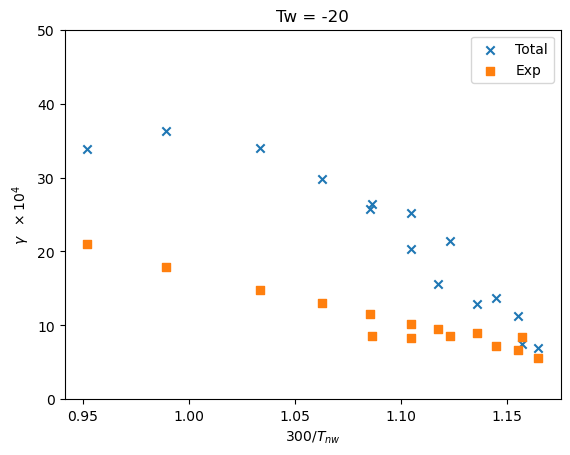

pair:  [282.57175514 284.71891904 287.06410587 288.58711704 292.09906212
 296.60300044 301.18416864 309.85776028 284.29651911 289.09946957
 293.46158067 296.50117368 301.41384452 307.2238784  315.28079366
 328.3456111  340.12752448]


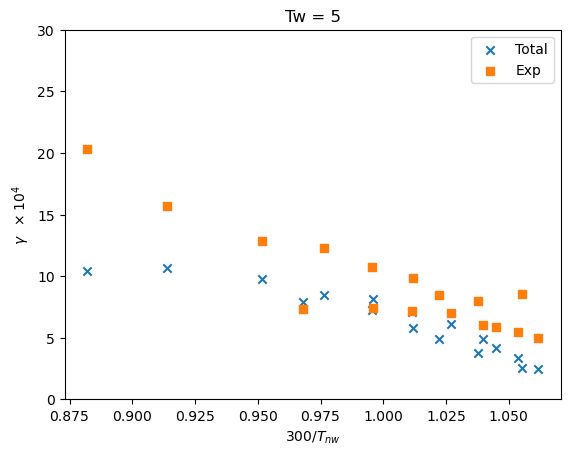

pair:  [302.57175514 304.71891904 307.06410587 308.58711704 312.09906212
 316.60300044 321.18416864 329.85776028 304.29651911 309.09946957
 313.46158067 316.50117368 321.41384452 327.2238784  335.28079366
 348.3456111  360.12752448]


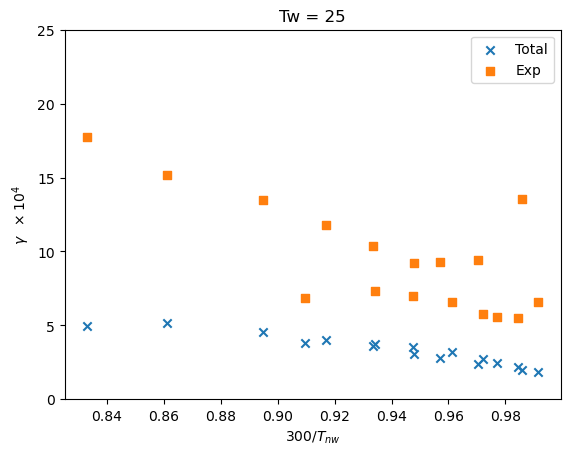

pair:  [327.57175514 329.71891904 332.06410587 333.58711704 337.09906212
 341.60300044 346.18416864 354.85776028 329.29651911 334.09946957
 338.46158067 341.50117368 346.41384452 352.2238784  360.28079366
 373.3456111  385.12752448]


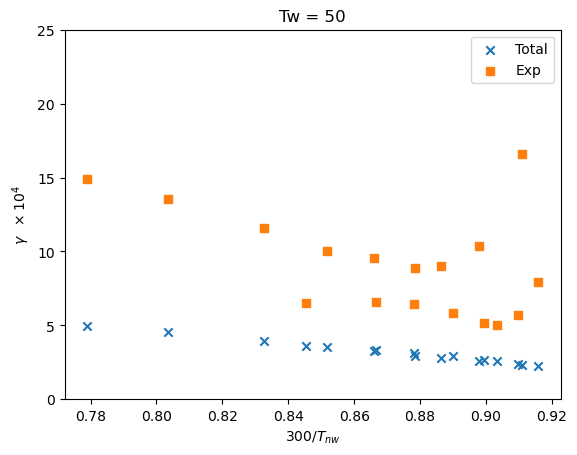

In [7]:
Tw_unique_values = np.unique(Tw_vec)


for value in Tw_unique_values:
    Tw = value
    indices = np.where((Tw_vec == Tw))[0]
    gammas_total = gammas_total_vec[indices]
    gammas_total_comp = gammas_data[indices, :]
    
    
    gammas_exp = gammas_exp_vec[indices]
    Tnw = Tnw_vec[indices]
    print("pair: ", Tnw)
    x_vec = 300*np.reciprocal(Tnw)
    
    pressure = pressure_vec[indices]
    # plt.figure()
    fig, ax = plt.subplots()
    ax.scatter(x_vec, gammas_total*1e4, label='Total', marker='x')
    ax.scatter(x_vec, gammas_exp*1e4, label='Exp', marker='s')
    
    
    if Tw-273.15 == -20:
        ax.set_yticks(range(0, 51, 10))
    if Tw-273.15 == 5:
        ax.set_yticks(range(0, 31, 5))
    if Tw-273.15 == 25:
        ax.set_yticks(range(0, 26, 5))
    if Tw-273.15 == 50:
        ax.set_yticks(range(0, 26, 5))
    
    # for i in range(gammas_data.shape[1]):
    #     plt.scatter(x_vec, gammas_total_comp[:, i], label=gammas_names[i], marker='.')
    
    # plt.grid()
    plt.xlabel(r"$300/T_{nw}$")
    plt.ylabel(r"$\gamma ~~ \times 10^4$")
    plt.title('Tw = %d' % (Tw-273.15))
    # plt.yscale('log')
    plt.legend()
    plt.show()